# PhiUSIIL Phishing URL

### Importing Packages

In [37]:
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [16]:
warnings.filterwarnings('ignore')

### Loading Dataset

In [17]:
df = pd.read_csv('PhiUSIIL_Phishing_URL_Dataset.csv')
df.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


## Exploratory Data Analysis
- Information about dataset
- Describe about dataset
- N-Unique values 
- Object column in dataset

### Information about dataset

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

### Describe about dataset

In [19]:
df.describe()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,...,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,34.573095,21.470396,0.002706,78.430778,0.845508,0.260423,0.055747,2.764456,1.164758,0.002057,...,0.237007,0.023474,0.486775,26.075689,6.333111,10.522305,65.071113,2.377629,49.262516,0.571895
std,41.314153,9.150793,0.051946,28.976055,0.216632,0.251628,0.010587,0.599739,0.600969,0.045306,...,0.425247,0.151403,0.499826,79.411815,74.866296,22.312192,176.687539,17.641097,161.027430,0.494805
min,13.000000,4.000000,0.000000,0.155574,0.000000,0.000000,0.001083,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,57.024793,0.680000,0.005977,0.050747,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,20.000000,0.000000,100.000000,1.000000,0.079963,0.057970,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,8.000000,2.000000,6.000000,12.000000,0.000000,10.000000,1.000000
75%,34.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.062875,3.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,29.000000,8.000000,15.000000,88.000000,1.000000,57.000000,1.000000
max,6097.000000,110.000000,1.000000,100.000000,1.000000,0.522907,0.090824,13.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,8956.000000,35820.000000,6957.000000,27397.000000,4887.000000,27516.000000,1.000000


### N-Unique Values

In [20]:
df.nunique()

FILENAME                      235795
URL                           235370
URLLength                        482
Domain                        220086
DomainLength                     101
IsDomainIP                         2
TLD                              695
URLSimilarityIndex             36360
CharContinuationRate             898
TLDLegitimateProb                465
URLCharProb                   227421
TLDLength                         12
NoOfSubDomain                     10
HasObfuscation                     2
NoOfObfuscatedChar                20
ObfuscationRatio                 146
NoOfLettersInURL                 421
LetterRatioInURL                 709
NoOfDegitsInURL                  182
DegitRatioInURL                  575
NoOfEqualsInURL                   25
NoOfQMarkInURL                     5
NoOfAmpersandInURL                31
NoOfOtherSpecialCharsInURL        74
SpacialCharRatioInURL            240
IsHTTPS                            2
LineOfCode                     10738
L

### Object columns in Dataset

In [21]:
df.select_dtypes('object')

,FILENAME,URL,Domain,TLD,Title
0,521848.txt,https://www.southbankmosaics.com,www.southbankmosaics.com,com,à¸‚à¹ˆà¸²à¸§à¸ªà¸” à¸‚à¹ˆà¸²à¸§à¸§à¸±à¸™à¸™à¸µ...
1,31372.txt,https://www.uni-mainz.de,www.uni-mainz.de,de,johannes gutenberg-universitÃ¤t mainz
2,597387.txt,https://www.voicefmradio.co.uk,www.voicefmradio.co.uk,uk,voice fm southampton
3,554095.txt,https://www.sfnmjournal.com,www.sfnmjournal.com,com,home page: seminars in fetal and neonatal medi...
4,151578.txt,https://www.rewildingargentina.org,www.rewildingargentina.org,org,fundaciÃ³n rewilding argentina
...,...,...,...,...,...
235790,660997.txt,https://www.skincareliving.com,www.skincareliving.com,com,skincareliving
235791,77185.txt,https://www.winchester.gov.uk,www.winchester.gov.uk,uk,winchestergov
235792,622132.txt,https://www.nononsensedesign.be,www.nononsensedesign.be,be,nononsensedesign
235793,7503962.txt,https://patient-cell-40f5.updatedlogmylogin.wo...,patient-cell-40f5.updatedlogmylogin.workers.dev,dev,patient-cell-40f5updatedlogmyloginworkers


### Checking for Null Values

In [22]:
df.isnull().sum()

FILENAME                      0
URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitle

### Checking for Correlation

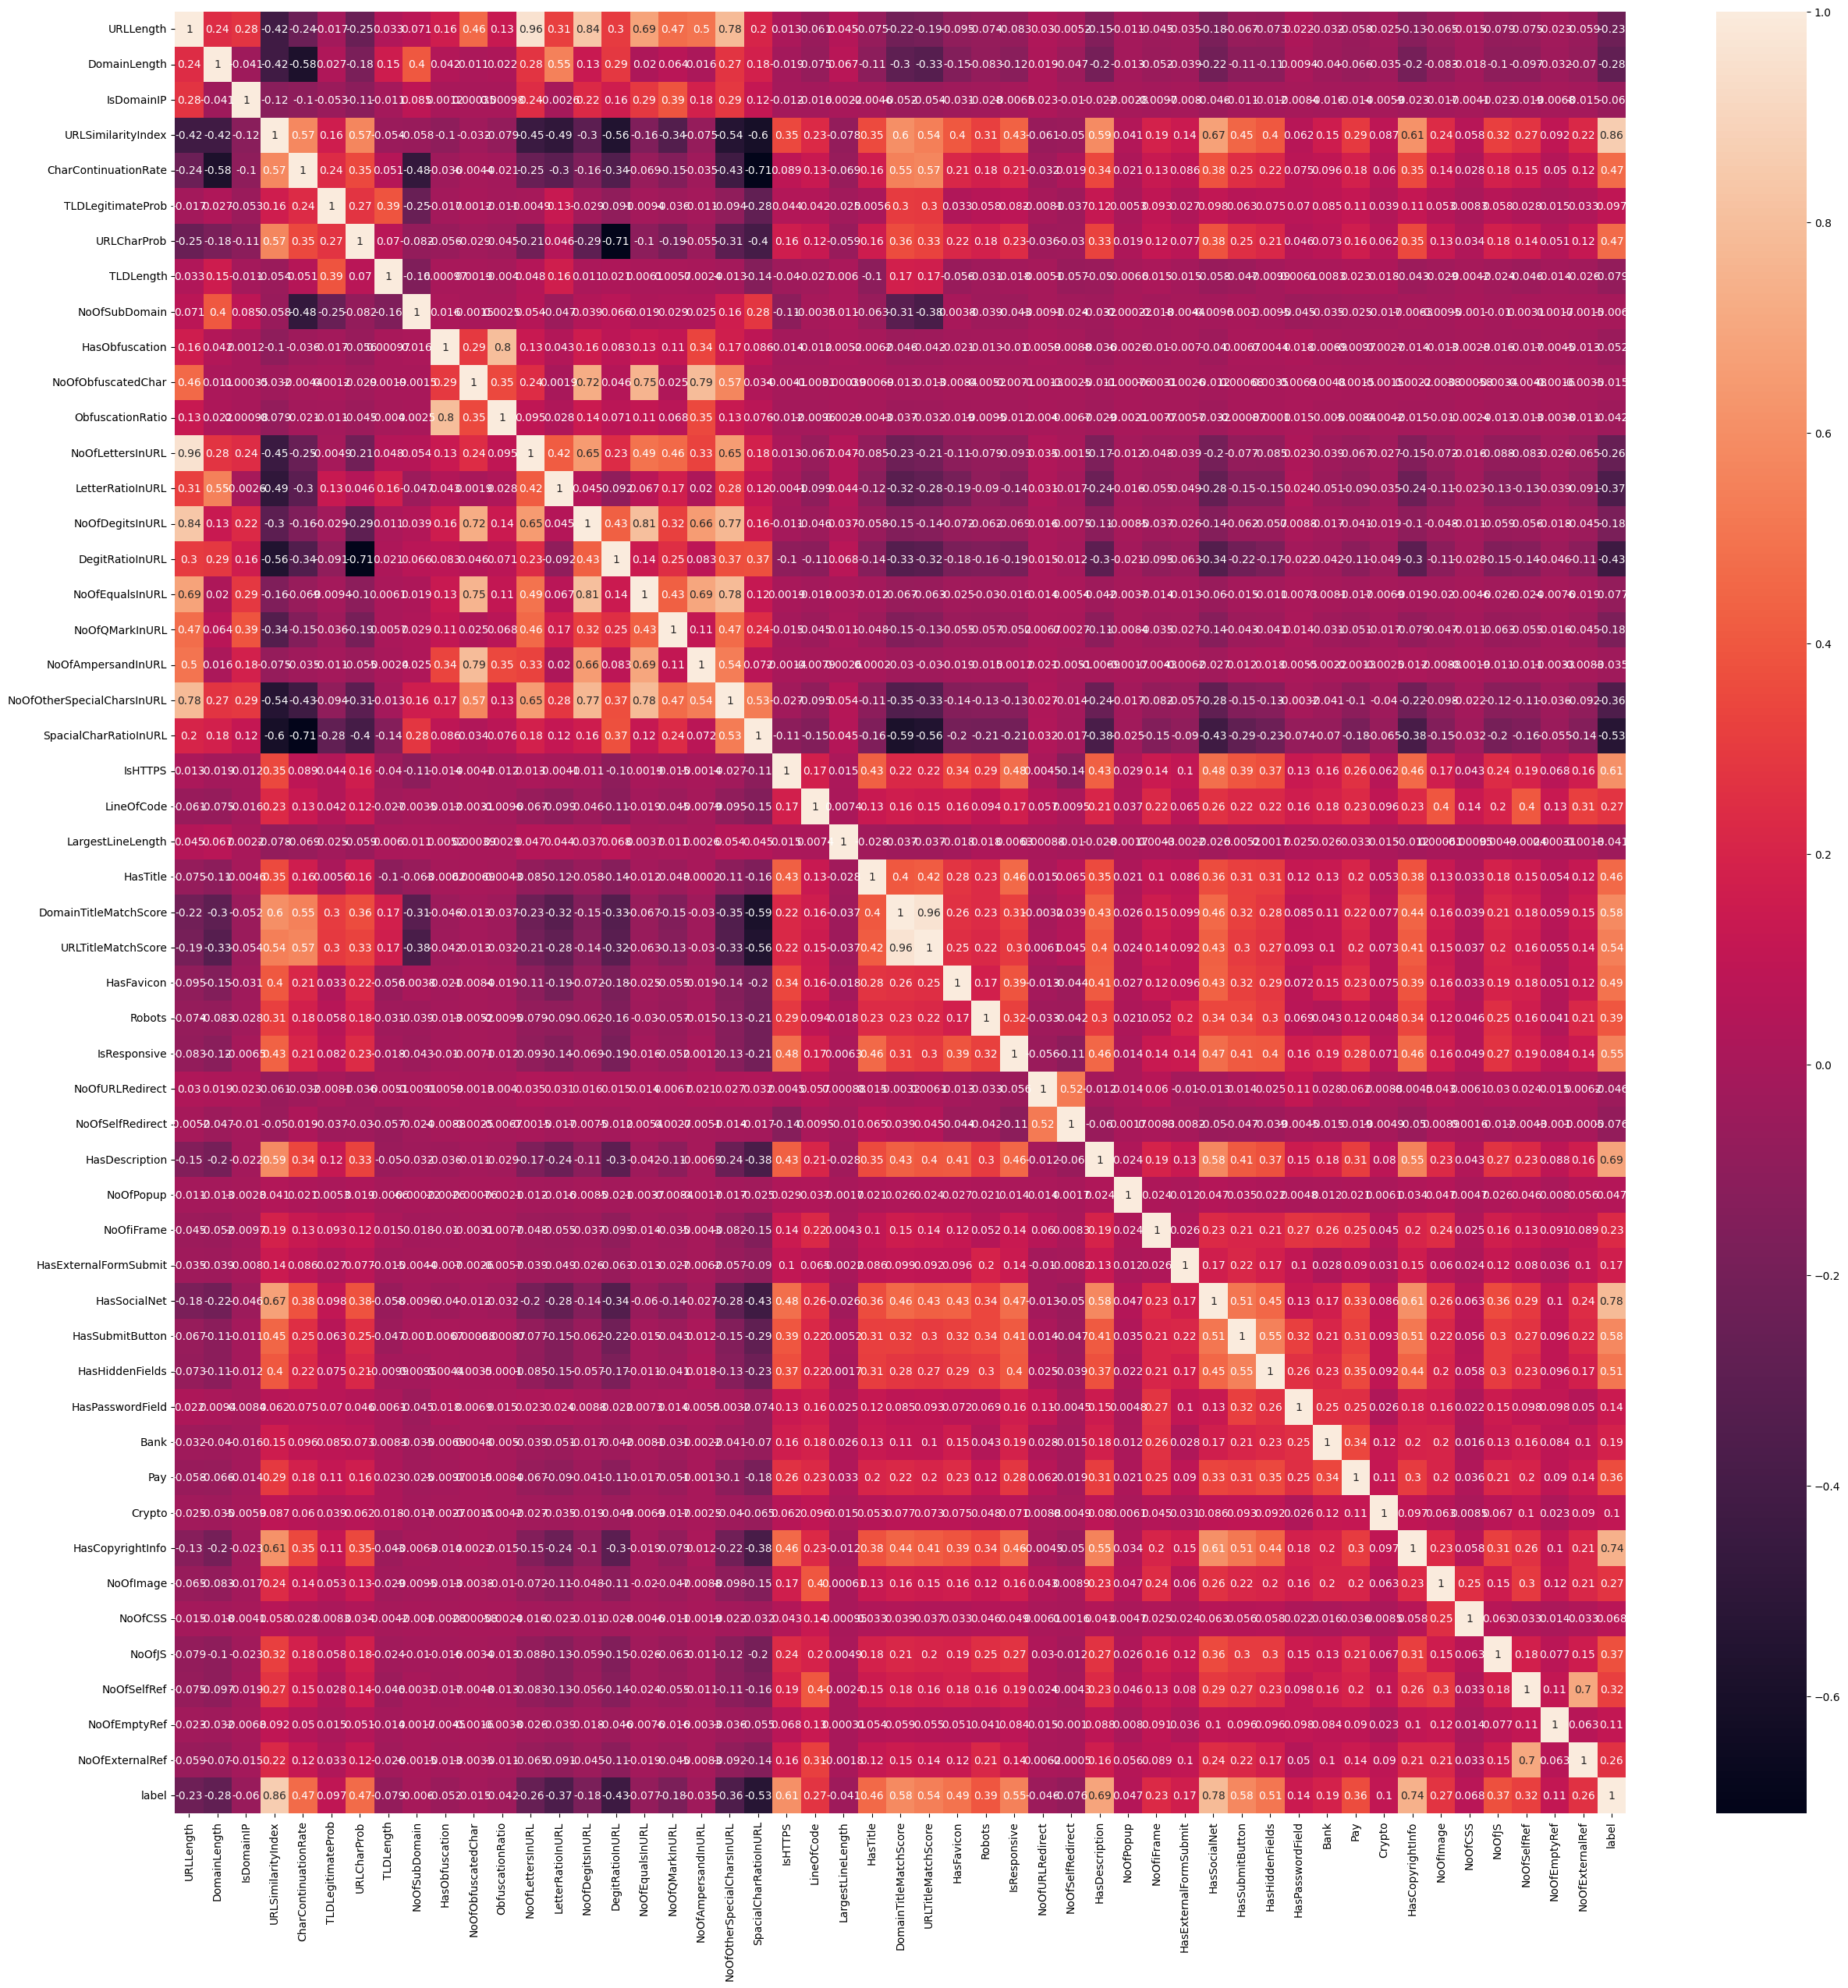

In [23]:
corr = df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(data=corr,annot=True)
plt.show()

### Dropping unwanted features

In [24]:
df = df.drop(['URL','Title','FILENAME'],axis=1)

In [25]:
df.columns

Index(['URLLength', 'Domain', 'DomainLength', 'IsDomainIP', 'TLD',
       'URLSimilarityIndex', 'CharContinuationRate', 'TLDLegitimateProb',
       'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation',
       'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL',
       'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL',
       'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL',
       'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS',
       'LineOfCode', 'LargestLineLength', 'HasTitle', 'DomainTitleMatchScore',
       'URLTitleMatchScore', 'HasFavicon', 'Robots', 'IsResponsive',
       'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup',
       'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet',
       'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay',
       'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS',
       'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef', 'label'],
      dtype

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 53 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URLLength                   235795 non-null  int64  
 1   Domain                      235795 non-null  object 
 2   DomainLength                235795 non-null  int64  
 3   IsDomainIP                  235795 non-null  int64  
 4   TLD                         235795 non-null  object 
 5   URLSimilarityIndex          235795 non-null  float64
 6   CharContinuationRate        235795 non-null  float64
 7   TLDLegitimateProb           235795 non-null  float64
 8   URLCharProb                 235795 non-null  float64
 9   TLDLength                   235795 non-null  int64  
 10  NoOfSubDomain               235795 non-null  int64  
 11  HasObfuscation              235795 non-null  int64  
 12  NoOfObfuscatedChar          235795 non-null  int64  
 13  ObfuscationRat

### Data Preprocessing
- Encoding Data
- Standarization of Data
- Splitting into Features & Label
- Train Test Split

### Encoding Data

In [29]:
encoder = OrdinalEncoder()
df_encoded = encoder.fit_transform(df)
df_encoded = pd.DataFrame(df_encoded,columns=df.columns)

### Standardization of Data

In [35]:
scaler = StandardScaler()
df_normalization = scaler.fit_transform(df_encoded)
df_normalization = pd.DataFrame(df_normalization,columns=df.columns)

In [41]:
df_normalization.columns

Index(['URLLength', 'Domain', 'DomainLength', 'IsDomainIP', 'TLD',
       'URLSimilarityIndex', 'CharContinuationRate', 'TLDLegitimateProb',
       'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation',
       'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL',
       'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL',
       'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL',
       'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS',
       'LineOfCode', 'LargestLineLength', 'HasTitle', 'DomainTitleMatchScore',
       'URLTitleMatchScore', 'HasFavicon', 'Robots', 'IsResponsive',
       'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup',
       'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet',
       'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay',
       'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS',
       'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef', 'label'],
      dtype

### Splitting Features & Label

In [42]:
df_features = df_normalization.drop('label',axis=1)
df_label = df_normalization[['label']]

### Train Test Split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(df_features,df_label,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(188636, 52) (47159, 52)
(188636, 1) (47159, 1)


### `NOTE:` Data Preprocessing for PhiUSIIL Phishing URL has prepared visit more: www.github.com/itechdp